In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import os
import shutil
import itertools
import math
import time
import PIL
from PIL import Image

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
cwd = os.getcwd() 
files = os.listdir(cwd) 
print("Files in %r: %s" % (cwd, files))



Files in 'C:\\Users\\Intel': ['.atom', '.bash_history', '.conda', '.condarc', '.config', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.node-gyp', '.npmrc', '.octave_hist', '.pylint.d', '.python_history', '.VirtualBox', '.vscode', '.windows-build-tools', '3D Objects', 'Anaconda2', 'anaconda3', 'ANZ synthesised transaction dataset (1).xlsx', 'AppData', 'Application Data', 'Banknote-authentication-dataset.csv', 'best_weights.hdf5', 'Brain Tumor Classification.ipynb', 'Contacts', 'Cookies', 'debug.log', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'get-pip.py', 'happyscore_income.csv', 'heart.csv', 'IntelGraphicsProfiles', 'JPMC-tech-task-1', 'JPMC-tech-task-1-py3', 'JPMC-tech-task-2', 'JPMC-tech-task-3', 'Links', 'Local Settings', 'MicrosoftEdgeBackups', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{46b02088-656c-11ea-9ad8-80ba0b5d2948}.TxR.0.regtrans-ms', 'NTUSER.DAT{46b02088-656c-11ea-9ad8-8

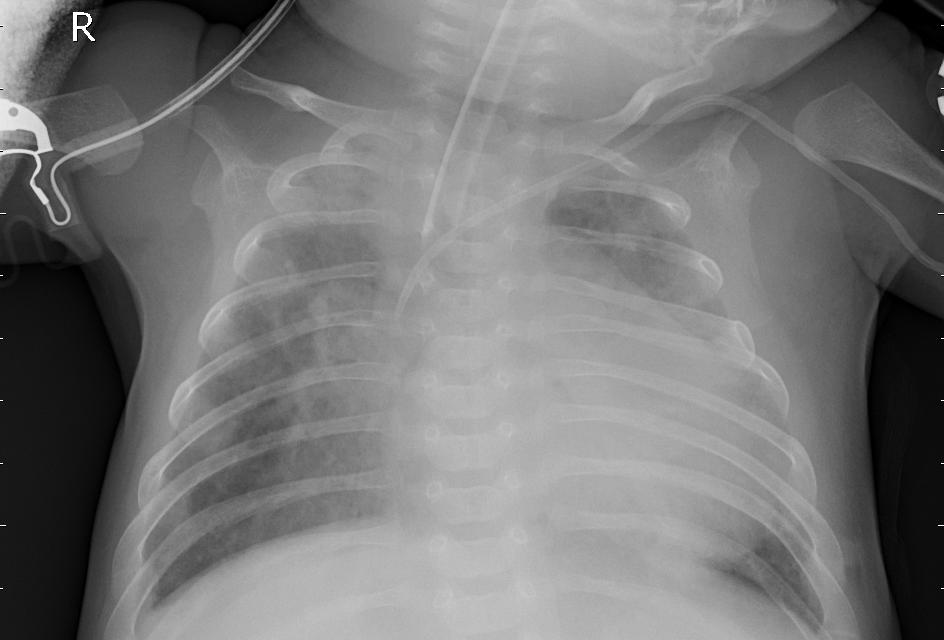

In [5]:
image = "C:\\Users\Intel\\Documents\\chest_xray\\test\\PNEUMONIA\\person1_virus_6.jpeg"
PIL.Image.open(image)

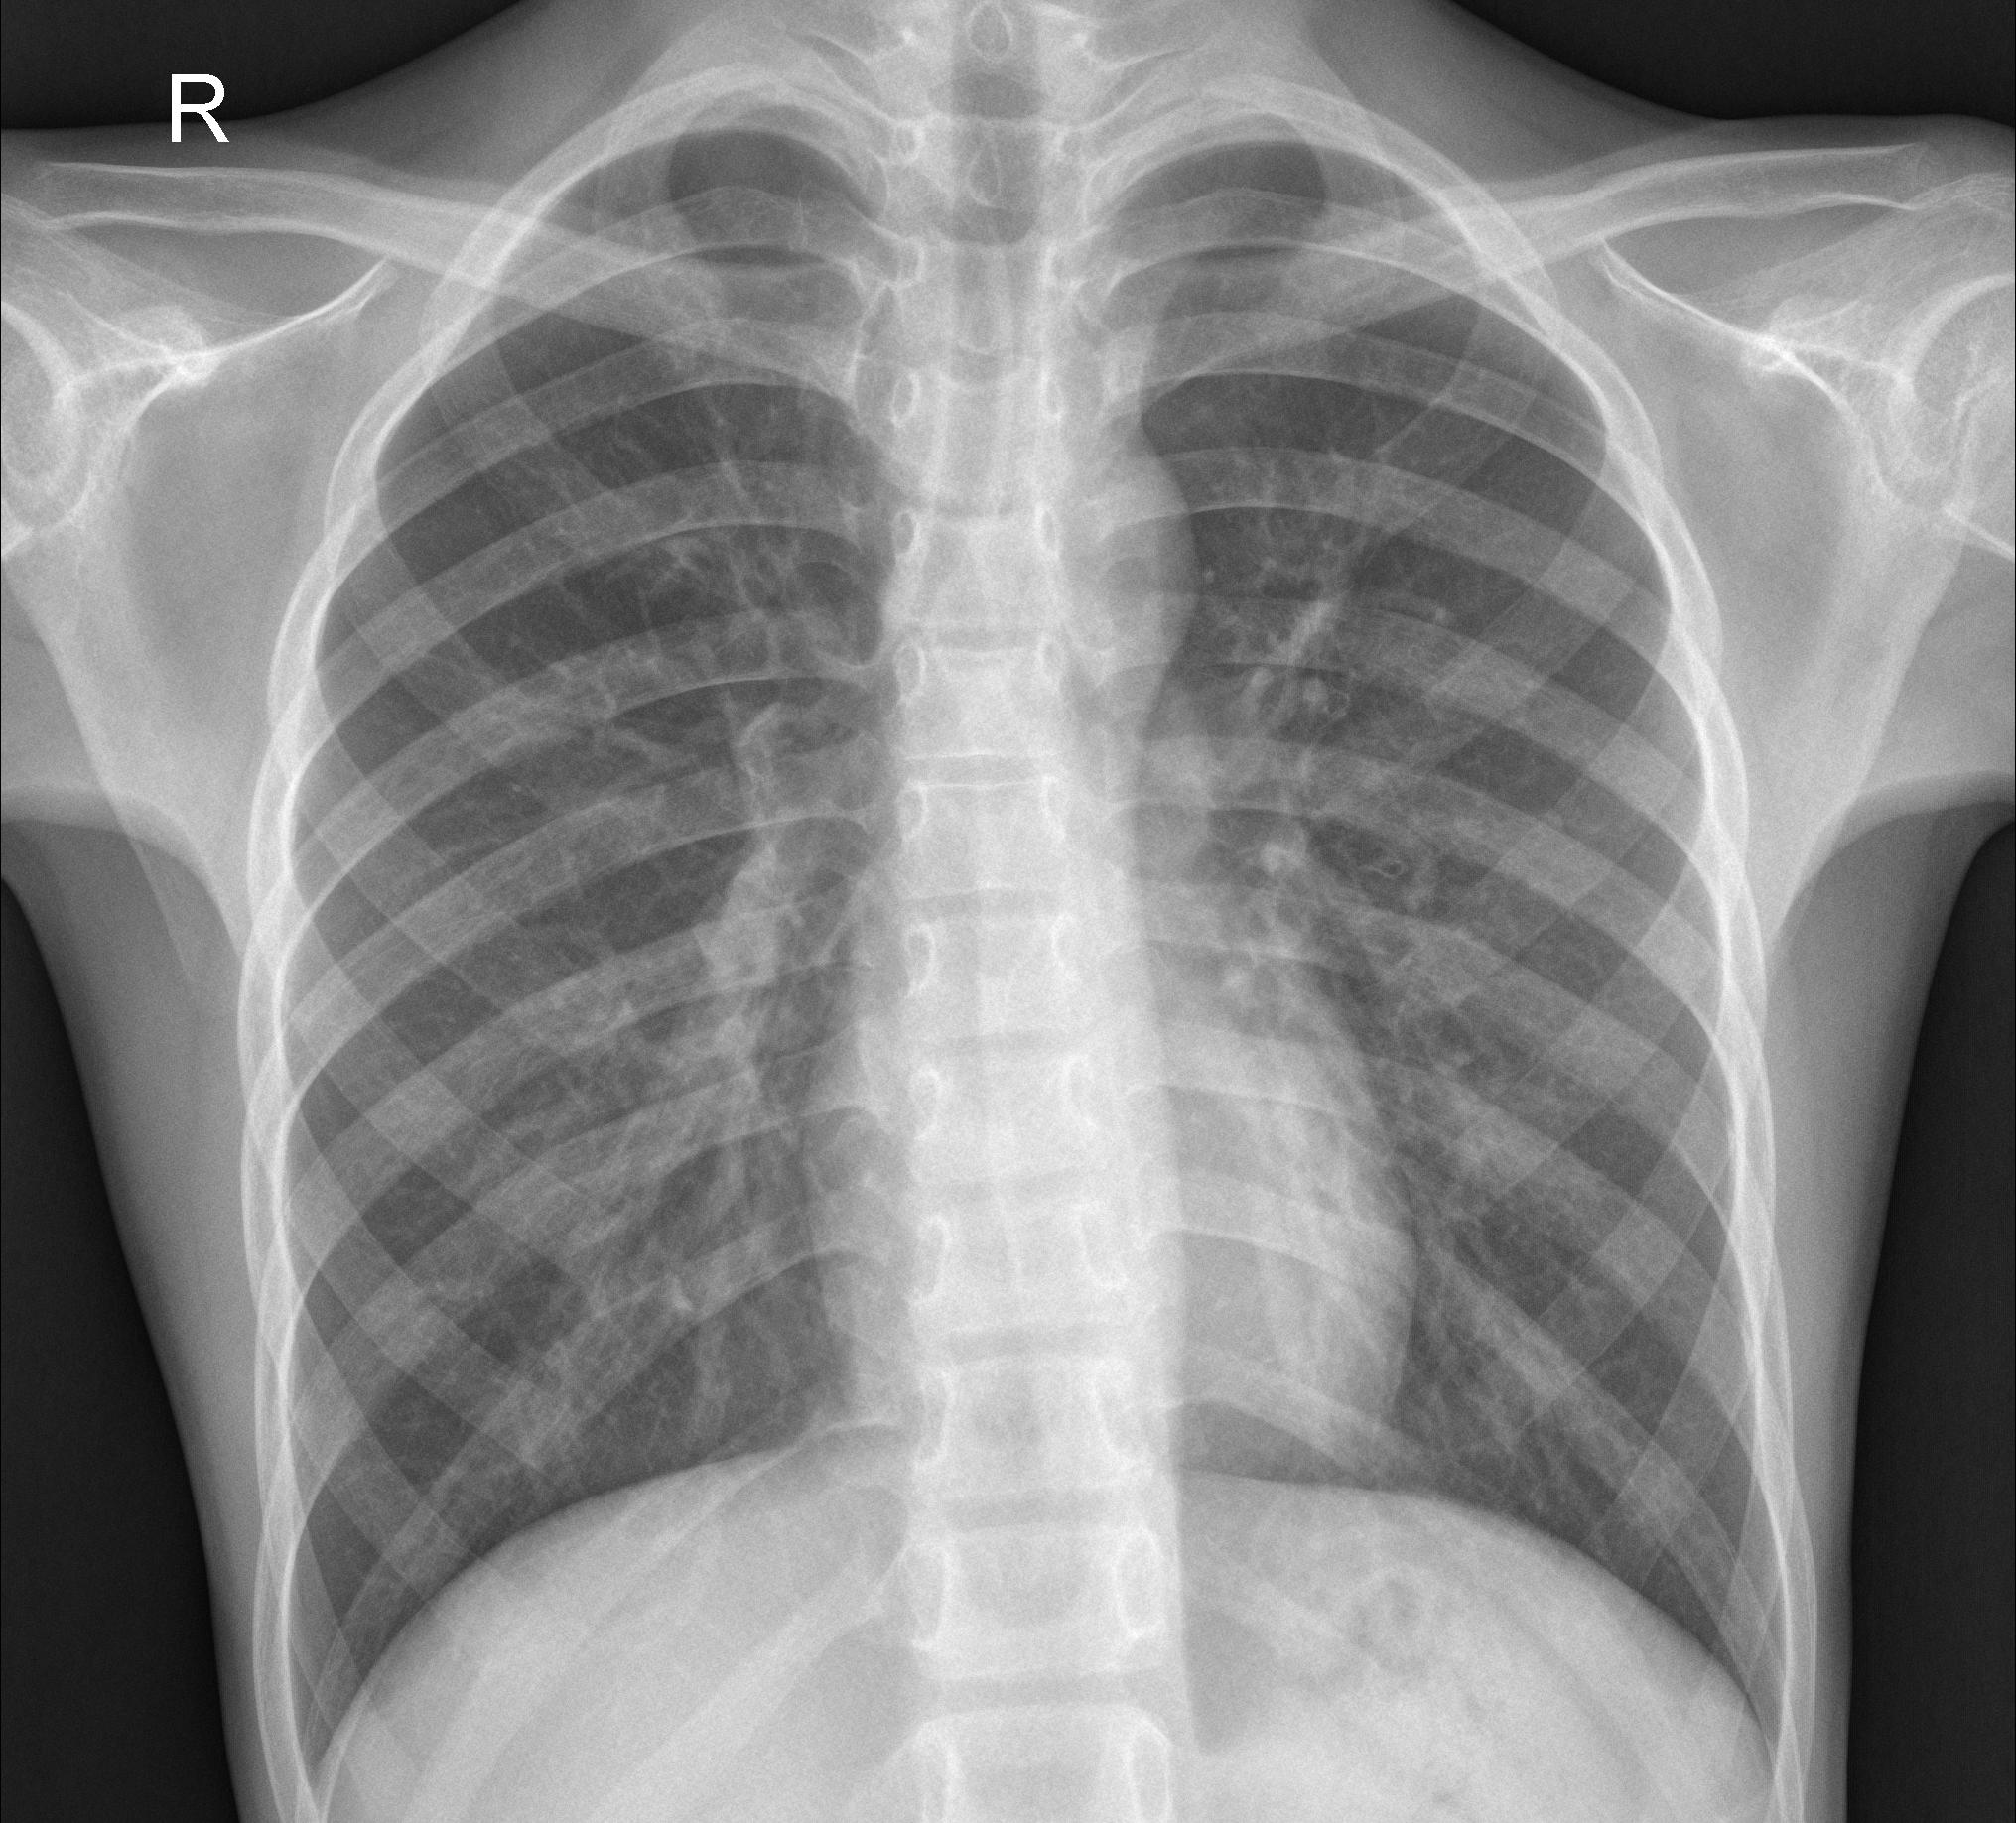

In [8]:
image_norm = "C:\\Users\Intel\\Documents\\chest_xray\\test\\NORMAL\\IM-0005-0001.jpeg"
PIL.Image.open(image_norm)


In [13]:
train_dir = "C:\\Users\Intel\\Documents\\chest_xray\\train"
training_generator = ImageDataGenerator(rescale=1/255, featurewise_center=False,  samplewise_center=False, featurewise_std_normalization=False, 
                                    samplewise_std_normalization=False, zca_whitening=False, rotation_range = 30, zoom_range = 0.2, width_shift_range = 0.1, 
                                    height_shift_range= 0.1, horizontal_flip=False,vertical_flip=False)
train_generator = training_generator.flow_from_directory(train_dir, target_size=(200,200), 
                                                         batch_size=4, class_mode='binary')


Found 5216 images belonging to 2 classes.


In [14]:
validation_dir = "C:\\Users\Intel\\Documents\\chest_xray\\val"
validation_generator = ImageDataGenerator(rescale=1/255)
val_generator = validation_generator.flow_from_directory(validation_dir, target_size=(200,200), 
                                                         batch_size=4, class_mode='binary')

Found 16 images belonging to 2 classes.


In [15]:
test_dir = "C:\\Users\Intel\\Documents\\chest_xray\\test"
test_generator = ImageDataGenerator(rescale=1/255)
test_generator = test_generator.flow_from_directory(test_dir, target_size=(200,200),
                                                   batch_size=4, class_mode='binary')

Found 624 images belonging to 2 classes.


In [16]:
cnn_baseline_model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])
 
cnn_baseline_model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [17]:

cnn_baseline_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0

In [18]:

cnn_baseline_model_hist = cnn_baseline_model.fit_generator(train_generator,
                                             validation_data = val_generator,
                                             epochs = 30, verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
1304/1304 [==============================] - 573s 440ms/step - loss: 0.4042 - accuracy: 0.8169 - val_loss: 0.7403 - val_accuracy: 0.6250
Epoch 2/30
1304/1304 [==============================] - 461s 354ms/step - loss: 0.2940 - accuracy: 0.8723 - val_loss: 0.6330 - val_accuracy: 0.6250
Epoch 3/30
1304/1304 [==============================] - 454s 348ms/step - loss: 0.2462 - accuracy: 0.8963 - val_loss: 0.7300 - val_accuracy: 0.7500
Epoch 4/30
1304/1304 [==============================] - 451s 346ms/step - loss: 0.2191 - accuracy: 0.9122 - val_loss: 0.5640 - val_accuracy: 0.6875
Epoch 5/30
1304/1304 [==============================] - 4808s 4s/step - loss: 0.1874 - accuracy: 0.9260 - val_loss: 0.4185 - val_accuracy: 0.8750
Epoch 6/30
1304/1304 [==============================] - 567s 435ms/step - loss: 0.1920 - accuracy: 0.9275 - val_loss: 0.4650 - val_accuracy: 0.8125
Epoch 7/30
1304/1304 [================

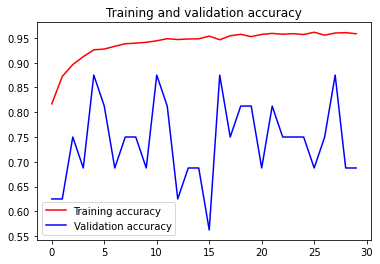

<Figure size 432x288 with 0 Axes>

In [19]:
acc = cnn_baseline_model_hist.history['accuracy']
val_acc = cnn_baseline_model_hist.history['val_accuracy']
loss = cnn_baseline_model_hist.history['loss']
val_loss = cnn_baseline_model_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure();


In [20]:
print("Loss of the model is: ", 
      cnn_baseline_model.evaluate(test_generator)[0]*100, "%")
print("Accuracy of the model is: ",
     cnn_baseline_model.evaluate(test_generator)[1]*100, "%")



156/156 [==============================] - 48s 309ms/step - loss: 0.3279 - accuracy: 0.9054
Loss of the model is:  32.78516232967377 %
156/156 [==============================] - 20s 126ms/step - loss: 0.3279 - accuracy: 0.9054
Accuracy of the model is:  90.54487347602844 %


In [21]:
cnn_model_drop=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2), 
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

cnn_model_drop.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])


In [22]:
cnn_model_drop_hist = cnn_model_drop.fit(train_generator, 
                                        validation_data = val_generator, 
                                        epochs = 30, verbose = 1)



Epoch 1/30
1304/1304 [==============================] - 613s 470ms/step - loss: 0.4272 - accuracy: 0.8031 - val_loss: 0.5024 - val_accuracy: 0.8125
Epoch 2/30
1304/1304 [==============================] - 565s 433ms/step - loss: 0.3032 - accuracy: 0.8616 - val_loss: 0.7162 - val_accuracy: 0.6250
Epoch 3/30
1304/1304 [==============================] - 528s 405ms/step - loss: 0.2648 - accuracy: 0.8867 - val_loss: 0.5941 - val_accuracy: 0.6875
Epoch 4/30
1304/1304 [==============================] - 599s 460ms/step - loss: 0.2343 - accuracy: 0.9024 - val_loss: 0.5062 - val_accuracy: 0.6875
Epoch 5/30
1304/1304 [==============================] - 547s 420ms/step - loss: 0.2221 - accuracy: 0.9099 - val_loss: 0.6456 - val_accuracy: 0.5625
Epoch 6/30
1304/1304 [==============================] - 534s 409ms/step - loss: 0.2126 - accuracy: 0.9124 - val_loss: 1.1202 - val_accuracy: 0.6250
Epoch 7/30
1304/1304 [==============================] - 541s 415ms/step - loss: 0.2042 - accuracy: 0.9185 - val_

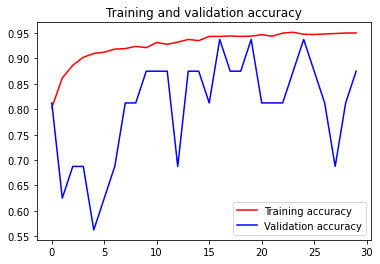

<Figure size 432x288 with 0 Axes>

In [23]:

acc = cnn_model_drop_hist.history['accuracy']
val_acc = cnn_model_drop_hist.history['val_accuracy']
loss = cnn_model_drop_hist.history['loss']
val_loss = cnn_model_drop_hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure();

In [24]:
print("Loss of the model is: ", 
      cnn_model_drop.evaluate(test_generator)[0]*100, "%")
print("Accuracy of the model is: ",
     cnn_model_drop.evaluate(test_generator)[1]*100, "%")



156/156 [==============================] - 38s 241ms/step - loss: 0.2860 - accuracy: 0.9054s - loss: 0.2868 - accuracy: 
Loss of the model is:  28.596395254135132 %
156/156 [==============================] - 24s 155ms/step - loss: 0.2860 - accuracy: 0.9054
Accuracy of the model is:  90.54487347602844 %


In [25]:
predictions = cnn_model_drop.predict_classes(test_generator)
predictions = predictions.reshape(1, -1)[0]
predictions[:10]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [26]:
true_classes = test_generator.classes


In [27]:
print(classification_report(true_classes, predictions, target_names= ['Pneumonia(class 0)', 'Normal (class 1)'] ))

                    precision    recall  f1-score   support

Pneumonia(class 0)       0.37      0.34      0.35       234
  Normal (class 1)       0.62      0.66      0.64       390

          accuracy                           0.54       624
         macro avg       0.50      0.50      0.50       624
      weighted avg       0.53      0.54      0.53       624



In [28]:
cm = confusion_matrix(true_classes, predictions)
cm

array([[ 79, 155],
       [134, 256]], dtype=int64)

In [29]:
cm = pd.DataFrame(cm, index = ['0','1'], columns = ['0','1'])

(2.5, -0.5)

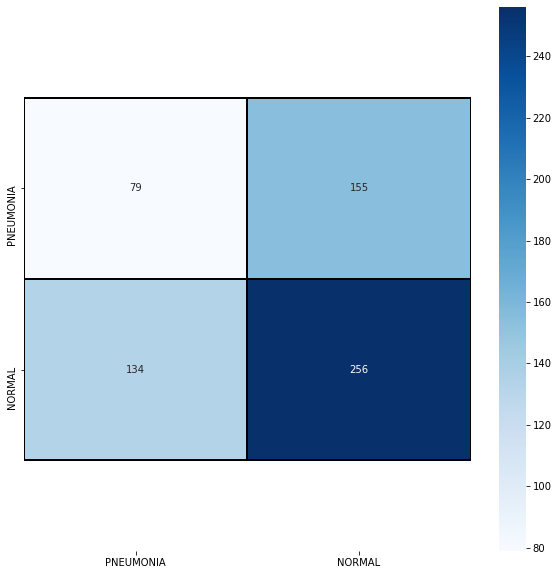

In [30]:
labels = ['PNEUMONIA', 'NORMAL']
plt.figure(figsize=(10,10))
ax = sns.heatmap(cm, cmap= "Blues", linecolor = 'black', linewidth = 1,
           annot = True, fmt = '', xticklabels = labels, yticklabels = labels)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [31]:
cnn_model_drop.save_weights("model.h5")

In [32]:
print("Saved model to SSD")

Saved model to SSD
